<a href="https://colab.research.google.com/github/shifatzaman/Taxi-Fare-Prediction-With-SHAP-XAI/blob/main/Taxi_fare_predictor_with_shap_xai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install necessary libraries**

In [ ]:
!pip install category_encoders
!pip install -U scikit-learn
!pip install shap
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import category_encoders as ce
import shap
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OrdinalEncoder

**Loading training data**

In [2]:
trainDataUrl = 'https://raw.githubusercontent.com/shifatzaman/Taxi-Fare-Prediction-With-SHAP-XAI/main/taxi-fare-train.csv'
train_data = pd.read_csv(trainDataUrl)
train_data.head()

,vendor_id,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type,fare_amount
0,CMT,1,1,1271,3.8,CRD,17.5
1,CMT,1,1,474,1.5,CRD,8.0
2,CMT,1,1,637,1.4,CRD,8.5
3,CMT,1,1,181,0.6,CSH,4.5
4,CMT,1,1,661,1.1,CRD,8.5


**Loading test data**

In [3]:
testDataUrl = 'https://raw.githubusercontent.com/shifatzaman/Taxi-Fare-Prediction-With-SHAP-XAI/main/taxi-fare-test.csv'
test_data = pd.read_csv(testDataUrl)
test_data.head()

,vendor_id,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type,fare_amount
0,VTS,1,1,1140,3.75,CRD,15.5
1,VTS,1,1,480,2.72,CRD,10.0
2,VTS,1,1,1680,7.80,CSH,26.5
3,VTS,1,1,600,4.73,CSH,14.5
4,VTS,1,1,600,2.18,CRD,9.5


**Check null values in training dataset**


> At first, we will check if there's any null value in the training dataset. If there is any, we will have to handle that.



In [4]:
train_data.isna().sum() 

vendor_id            0
rate_code            0
passenger_count      0
trip_time_in_secs    0
trip_distance        0
payment_type         0
fare_amount          0
dtype: int64

**Check Non-numerical/categorical values in the dataset**

> As our model can't work on categorical values, we will need to find out if there is any categorical value in the dataset



In [5]:
train_data.dtypes

vendor_id             object
rate_code              int64
passenger_count        int64
trip_time_in_secs      int64
trip_distance        float64
payment_type          object
fare_amount          float64
dtype: object

**Encoding categorical data**
> We have two columns with categorical data in our training dataset - vendor_id and payment_type. We will encode these using One Hot Encoder. In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.




In [ ]:
OHE = ce.OneHotEncoder(cols=['vendor_id',
                             'payment_type'],use_cat_names=True)

# encode the categorical variables in train data
train_data = OHE.fit_transform(train_data)

**State of training dataset after encoding**


> Once we encoded the columns 'vendor_id' and 'payment_type' it created two separate columns for vendor_id as it has two categorical values and five separate columns for 'payment_type' as it has five separate categorical values 



In [7]:
train_data.head()

,vendor_id_CMT,vendor_id_VTS,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type_CRD,payment_type_CSH,payment_type_NOC,payment_type_DIS,payment_type_UNK,fare_amount
0,1,0,1,1,1271,3.8,1,0,0,0,0,17.5
1,1,0,1,1,474,1.5,1,0,0,0,0,8.0
2,1,0,1,1,637,1.4,1,0,0,0,0,8.5
3,1,0,1,1,181,0.6,0,1,0,0,0,4.5
4,1,0,1,1,661,1.1,1,0,0,0,0,8.5


**Separating features and label**
> In this step we will separate the features and label. We will save the features from training dataset in train_X and label in train_Y.





In [8]:
train_X = train_data.drop(columns=['fare_amount'])
train_Y = train_data['fare_amount']

**Preparing test dataset**


> In this step, we will process our test dataset in the same way we did for our training dataset. First we will check and remove null and categorical values. Then we will encode categorical values and save the features and label in two separate variables named test_X and test_Y



In [9]:
test_data.isna().sum() 

vendor_id            0
rate_code            0
passenger_count      0
trip_time_in_secs    0
trip_distance        0
payment_type         0
fare_amount          0
dtype: int64

In [10]:
test_data.dtypes

vendor_id             object
rate_code              int64
passenger_count        int64
trip_time_in_secs      int64
trip_distance        float64
payment_type          object
fare_amount          float64
dtype: object

In [11]:
# encode the categorical variables in test data
test_data = OHE.fit_transform(test_data)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [12]:
test_X = test_data.drop(columns=['fare_amount'])
test_Y = test_data['fare_amount']

**Training Model**

> In this step we will use traing using linear regression. We have fit a linear regression model to our training dataset. 



In [13]:
model_LR = LinearRegression()

In [14]:
# fit the model with the training data
model_LR.fit(train_X, train_Y)

LinearRegression()

**Model Evaluation**

In [15]:
print("Score on training dataset- ", model_LR.score(train_X, train_Y))

Score on training dataset-  0.8751264185214683


In [16]:
print("Score on test dataset- ", model_LR.score(test_X, test_Y))

Score on test dataset-  0.802221456889139


In [17]:
predict_train = model_LR.predict(train_X)

In [18]:
print('Mean absolute error on train data: ', mean_absolute_error(train_Y, predict_train))

Mean absolute error on train data:  0.8483768403392281


In [19]:
print('Mean absolute error percentage on train data: ', mean_absolute_percentage_error(train_Y, predict_train) * 100)

Mean absolute error percentage on train data:  7.358908309404945


In [20]:
predict_test = model_LR.predict(test_X)

In [21]:
print('Mean absolute error on test data: ', mean_absolute_error(test_Y, predict_test))

Mean absolute error on test data:  0.8732104119874754


In [22]:
print('Mean absolute error percentage on test data: ', mean_absolute_percentage_error(test_Y, predict_test) * 100)

Mean absolute error percentage on test data:  7.7218075216112885


In [23]:
print("Model coefficients :\n")

for i in range(train_X.shape[1]):
    print(train_X.columns[i], "=", model_LR.coef_[i].round(4))

Model coefficients :

vendor_id_CMT = -0.0023
vendor_id_VTS = 0.0023
rate_code = 9.2646
passenger_count = -0.0072
trip_time_in_secs = 0.0065
trip_distance = 1.5728
payment_type_CRD = 1.5885
payment_type_CSH = 1.3651
payment_type_NOC = -3.2031
payment_type_DIS = -2.0214
payment_type_UNK = 2.2709


**Predicting Taxi Fare**
> We have already trained our model using training dataset. Now, we will predict taxi fare based on feature values of a selected row from our test dataset.


> We have stored the row number for which we will give prediction in a variable named 'rowNumberToTest'. Based on it, we will print the predicted fare and actual fare for that row.






In [24]:
rowNumberToTest = 22

testDataIndexForPrediction = rowNumberToTest -2

print("Predicted Fare: ", predict_test[testDataIndexForPrediction].round(2))
print("Actual Fare: ", test_Y.iloc[testDataIndexForPrediction])

Predicted Fare:  7.08
Actual Fare:  6.5


**Model Explanation using SHAP**

> In this phase, we will explain our model using SHAP



In [25]:
X100 = shap.utils.sample(test_X, 100)

In [26]:
explainer = shap.Explainer(model_LR.predict, X100)
shap_values = explainer(test_X.head(100))

**SHAP Feature importance**

> In the following figure we have displayed feature importance calculated by SHAP values (features with large absolute Shapley values are important)



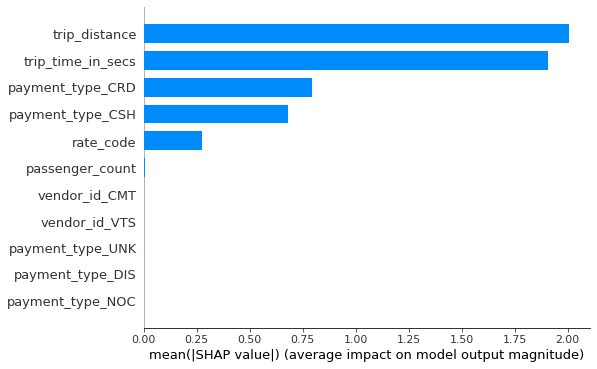

In [27]:
shap.summary_plot(shap_values, test_X, feature_names=test_X.columns, plot_type="bar")

**Partial dependence plot (trip_distance)**
> To understand a feature’s importance in a model it is necessary to understand both how changing that feature impacts the model’s output, and also the distribution of that feature’s values. To visualize this for a linear model we can build a classical partial dependence plot and show the distribution of feature values as a histogram on the x-axis.



> The gray horizontal line in the plot below represents the expected value of the model when applied to the test dataset. The vertical gray line represents the average value of the **trip_distance** feature. Note that the blue partial dependence plot line (which the is average value of the model output when we fix the trip_distance feature to a given value) always passes through the interesection of the two gray expected value lines. We can consider this intersection point as the “center” of the partial dependence plot with respect to the data distribution.




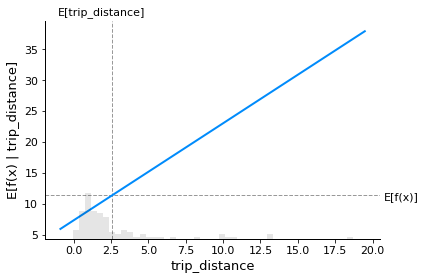

In [28]:
shap.plots.partial_dependence(
    "trip_distance", model_LR.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

**Reading SHAP values from partial dependence plots**

> SHAP values can be very complicated to compute, but linear models are so simple that we can read the SHAP values right off the partial dependence plot. When we are explaining a prediction , the SHAP value for a specific feature  is just the difference between the expected model output and the partial dependence plot at the feature’s value.


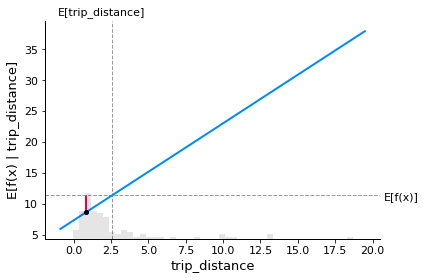

In [29]:
shap.partial_dependence_plot(
    "trip_distance", model_LR.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[testDataIndexForPrediction:testDataIndexForPrediction+1,:]
)

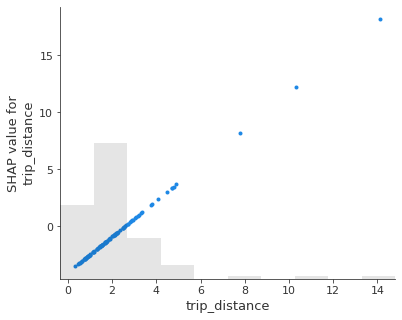

In [30]:
shap.plots.scatter(shap_values[:,"trip_distance"])

**Partial dependence plot (trip_time_in_secs)**

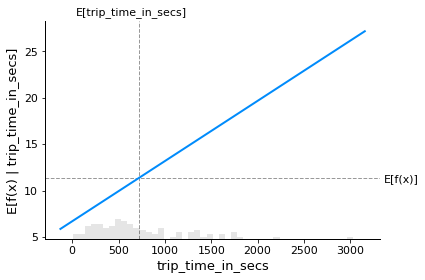

In [31]:
shap.plots.partial_dependence(
    "trip_time_in_secs", model_LR.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

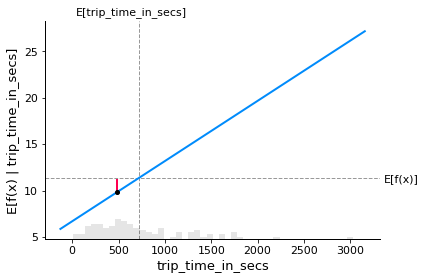

In [32]:
shap.partial_dependence_plot(
    "trip_time_in_secs", model_LR.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[testDataIndexForPrediction:testDataIndexForPrediction+1,:]
)

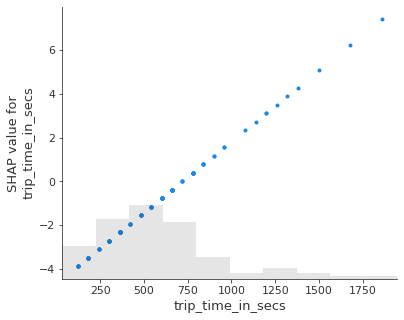

In [33]:
shap.plots.scatter(shap_values[:,"trip_time_in_secs"])

**Waterfall Plot**

> One the fundemental properties of Shapley values is that they always sum up to the difference between the game outcome when all players are present and the game outcome when no players are present. For machine learning models this means that SHAP values of all the input features will always sum up to the difference between baseline (expected) model output and the current model output for the prediction being explained. The easiest way to see this is through a waterfall plot that starts our background prior expectation for a taxi fare , and then adds features one at a time until we reach the current model output :



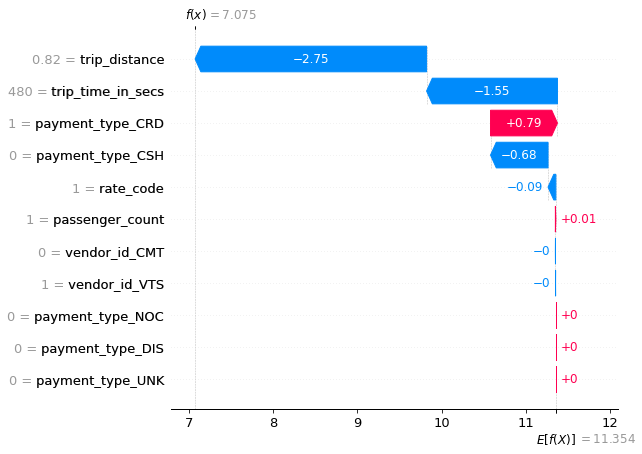

In [34]:

shap.plots.waterfall(shap_values[testDataIndexForPrediction], max_display=14)